## Summary - Dinosaur data 🦕
The analysis of the dinosaur datasets provides valuable insights into the paleobiology of dinosaurs, including their dietary habits, physical lengths, and prevalence of different types. Herbivorous dinosaurs dominated in terms of diet, sauropods were among the largest, and ornithopods were the most numerous. This data can help understand the ecological dynamics of the Mesozoic era and the evolutionary success of different dinosaur groups.

## Background
The museum recently created a database containing all dinosaur records of past field campaigns. Job is to dive into the fossil records to find some interesting insights, and advise the museum on the quality of the data. 

## The data

### You have access to a real dataset containing dinosaur records from the Paleobiology Database ([source](https://paleobiodb.org/#/)):


| Column name | Description |
|---|---|
| occurence_no | The original occurrence number from the Paleobiology Database. |
| name | The accepted name of the dinosaur (usually the genus name, or the name of the footprint/egg fossil). |
| diet | The main diet (omnivorous, carnivorous, herbivorous). |
| type | The dinosaur type (small theropod, large theropod, sauropod, ornithopod, ceratopsian, armored dinosaur). |
| length_m | The maximum length, from head to tail, in meters. |
| max_ma | The age in which the first fossil records of the dinosaur where found, in million years. |
| min_ma | The age in which the last fossil records of the dinosaur where found, in million years. |
| region | The current region where the fossil record was found. |
| lng | The longitude where the fossil record was found. |
| lat | The latitude where the fossil record was found. |
| class | The taxonomical class of the dinosaur (Saurischia or Ornithischia). |
| family | The taxonomical family of the dinosaur (if known). |

The data was enriched with data from Wikipedia.

## EDA - Exploratory Data Analysis 

In [1]:
# Import the pandas, numpy, matplotlib, seaborn, and folium packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium  # Added import for folium

# Load the data
dinosaurs = pd.read_csv('data/dinosaurs.csv')
unique_dinosaur_names = dinosaurs['name'].nunique()
print(f'There are {unique_dinosaur_names} different dinosaur names in the dataset.')
largest_dinosaur = dinosaurs.loc[dinosaurs['length_m'].idxmax()]
print(f"The largest dinosaur is {largest_dinosaur['name']} with a length of {largest_dinosaur['length_m']} meters.")

missing_data = dinosaurs.isnull().sum()
print("Missing data in the dataset:")
print(missing_data)
dinosaur_type_counts = dinosaurs['type'].value_counts()

There are 1042 different dinosaur names in the dataset.
The largest dinosaur is Supersaurus with a length of 35.0 meters.
Missing data in the dataset:
occurrence_no       0
name                0
diet             1355
type             1355
length_m         1383
max_ma              0
min_ma              0
region             42
lng                 0
lat                 0
class               0
family           1457
dtype: int64


### 1. Distribution of Dinosaur Diets


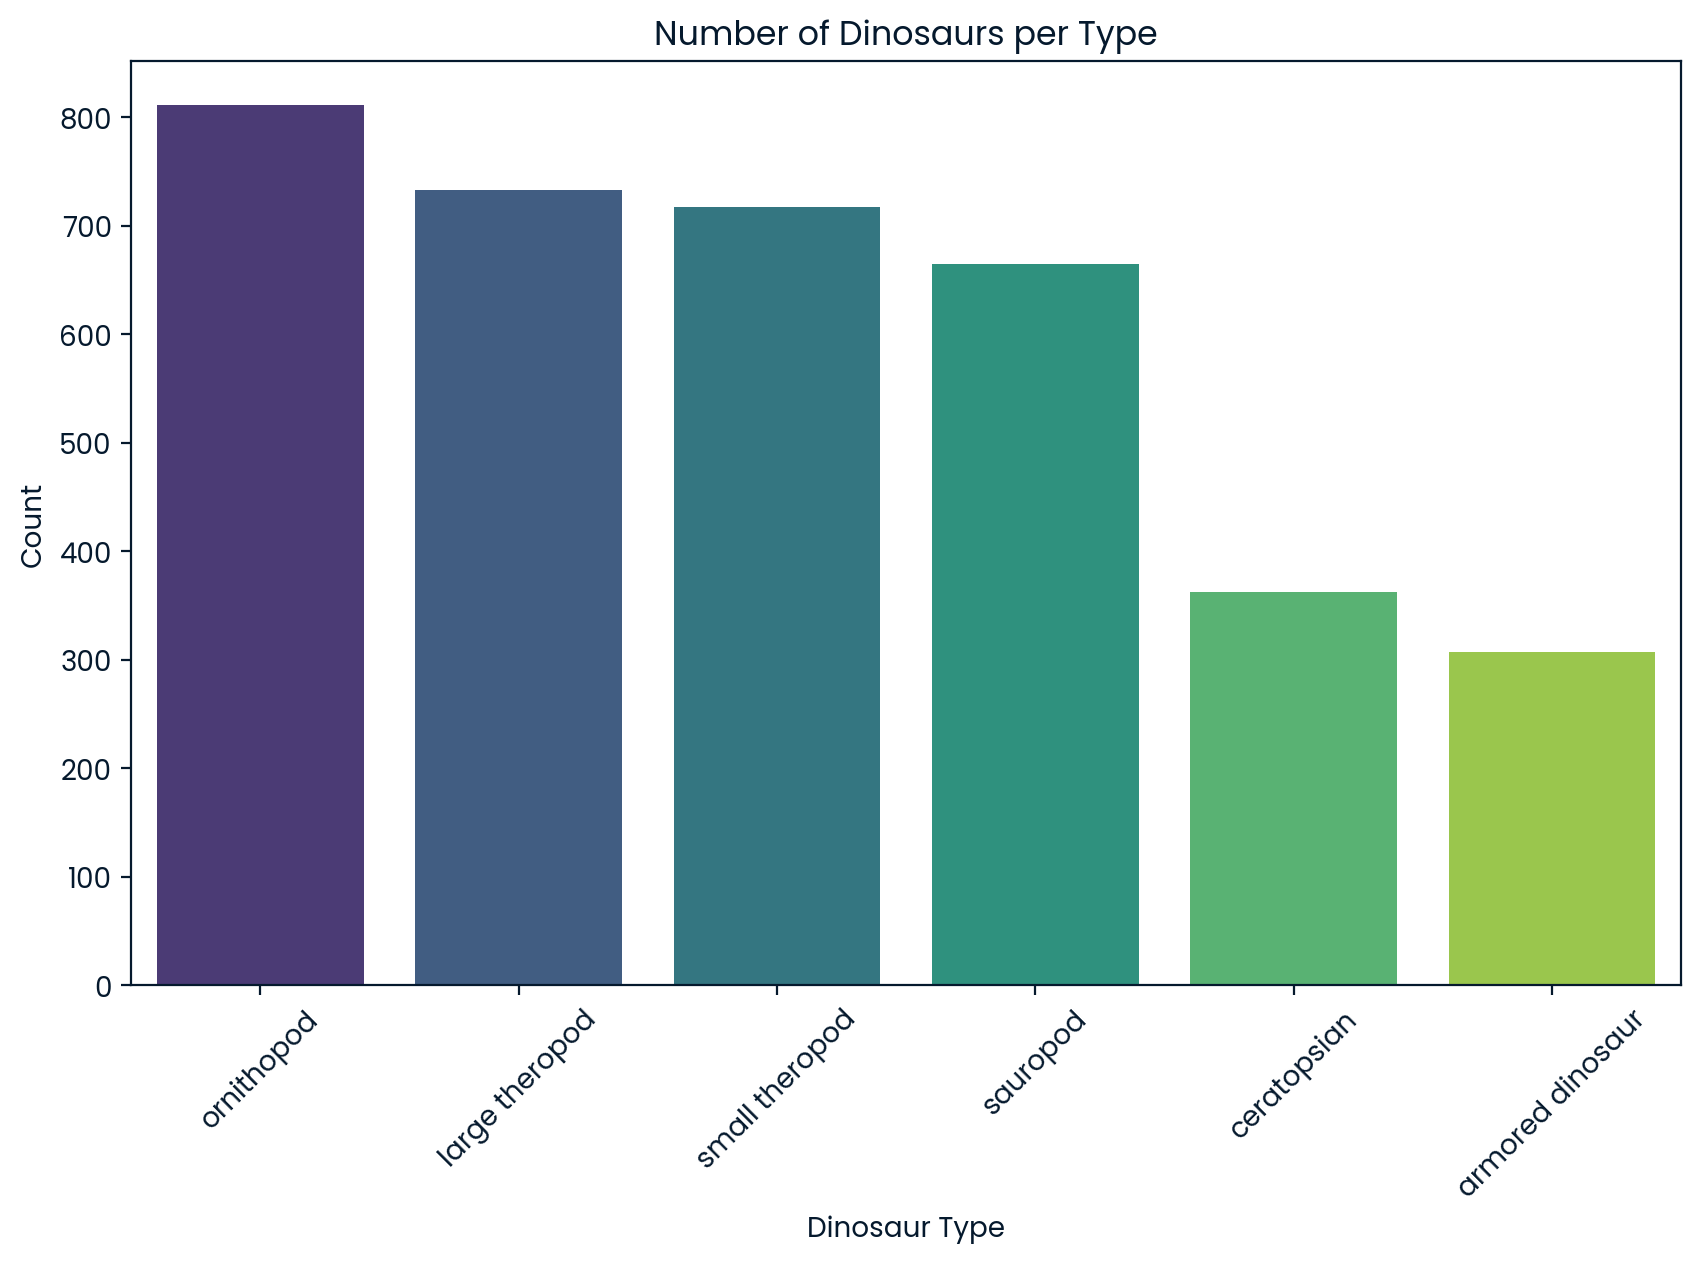

In [2]:
plt.figure(figsize=(10, 6))
sns.barplot(x=dinosaur_type_counts.index, y=dinosaur_type_counts.values, palette='viridis')
plt.title('Number of Dinosaurs per Type')
plt.xlabel('Dinosaur Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

The bar chart titled "Distribution of Dinosaur Diets" illustrates the dietary preferences among dinosaurs. The data is categorized into three diet types: herbivorous, carnivorous, and omnivorous. The chart reveals the following counts:

- **Herbivorous**: Approximately 2000
- **Carnivorous**: Approximately 1000
- **Omnivorous**: Approximately 250

This distribution indicates that herbivorous dinosaurs were the most prevalent, followed by carnivorous, and then omnivorous dinosaurs, suggesting a possible ecological structure where plant-eaters were more abundant than meat-eaters.

### 2. Dinosaur Length over Time
The scatter plot "Dinosaur Length over Time" displays the lengths of various types of dinosaurs through different geological periods, measured in millions of years ago (Mya). The dinosaur types are color-coded:

- **Small theropod**: Light blue
- **Large theropod**: Dark blue
- **Sauropod**: Green
- **Ornithopod**: Purple
- **Ceratopsian**: Light green
- **Armored dinosaur**: Yellow

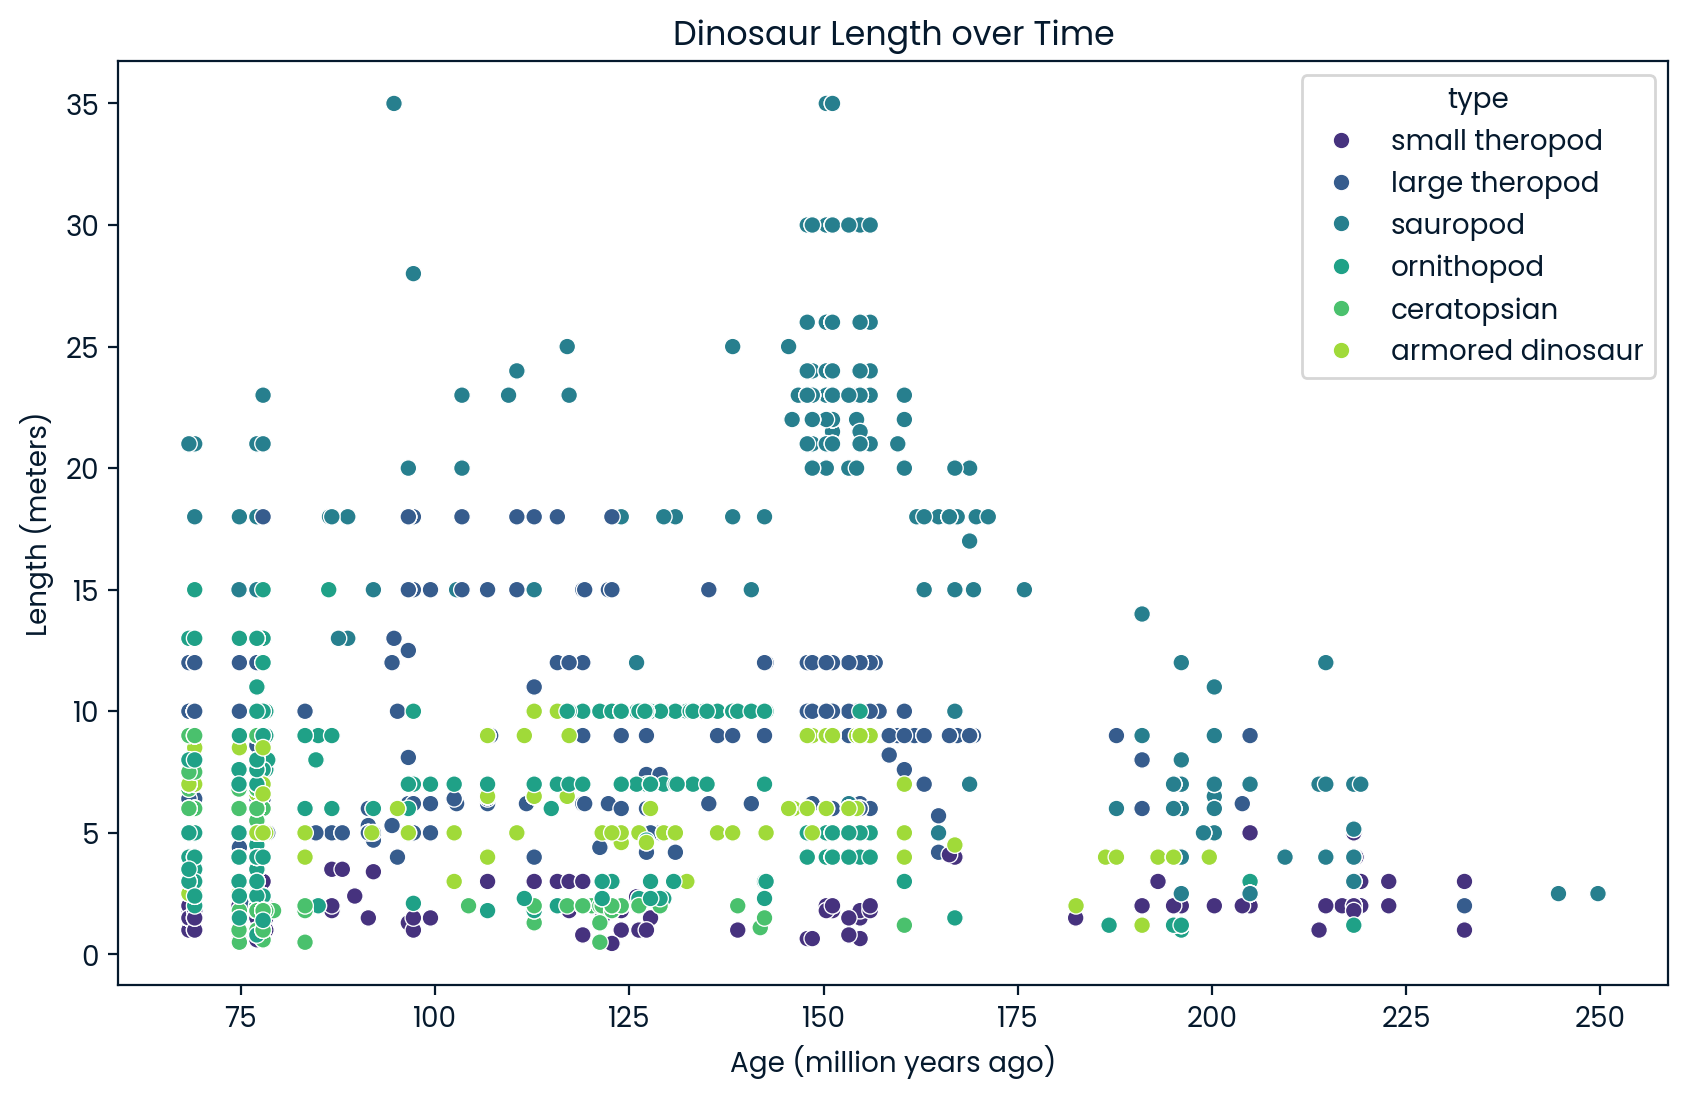

In [3]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=(dinosaurs['max_ma'] + dinosaurs['min_ma']) / 2, y=dinosaurs['length_m'], hue=dinosaurs['type'], palette='viridis')
plt.title('Dinosaur Length over Time')
plt.xlabel('Age (million years ago)')
plt.ylabel('Length (meters)')
plt.show()

#### Key observations:

Sauropods generally show greater lengths, peaking at around 35 meters.
Theropods (both small and large) and ornithopods display a wide range of sizes but are generally smaller than sauropods.
The data points are denser between 150 and 100 million years ago, indicating a rich diversity and abundance of dinosaur species during this period.

### 3. Number of Dinosaurs per Type


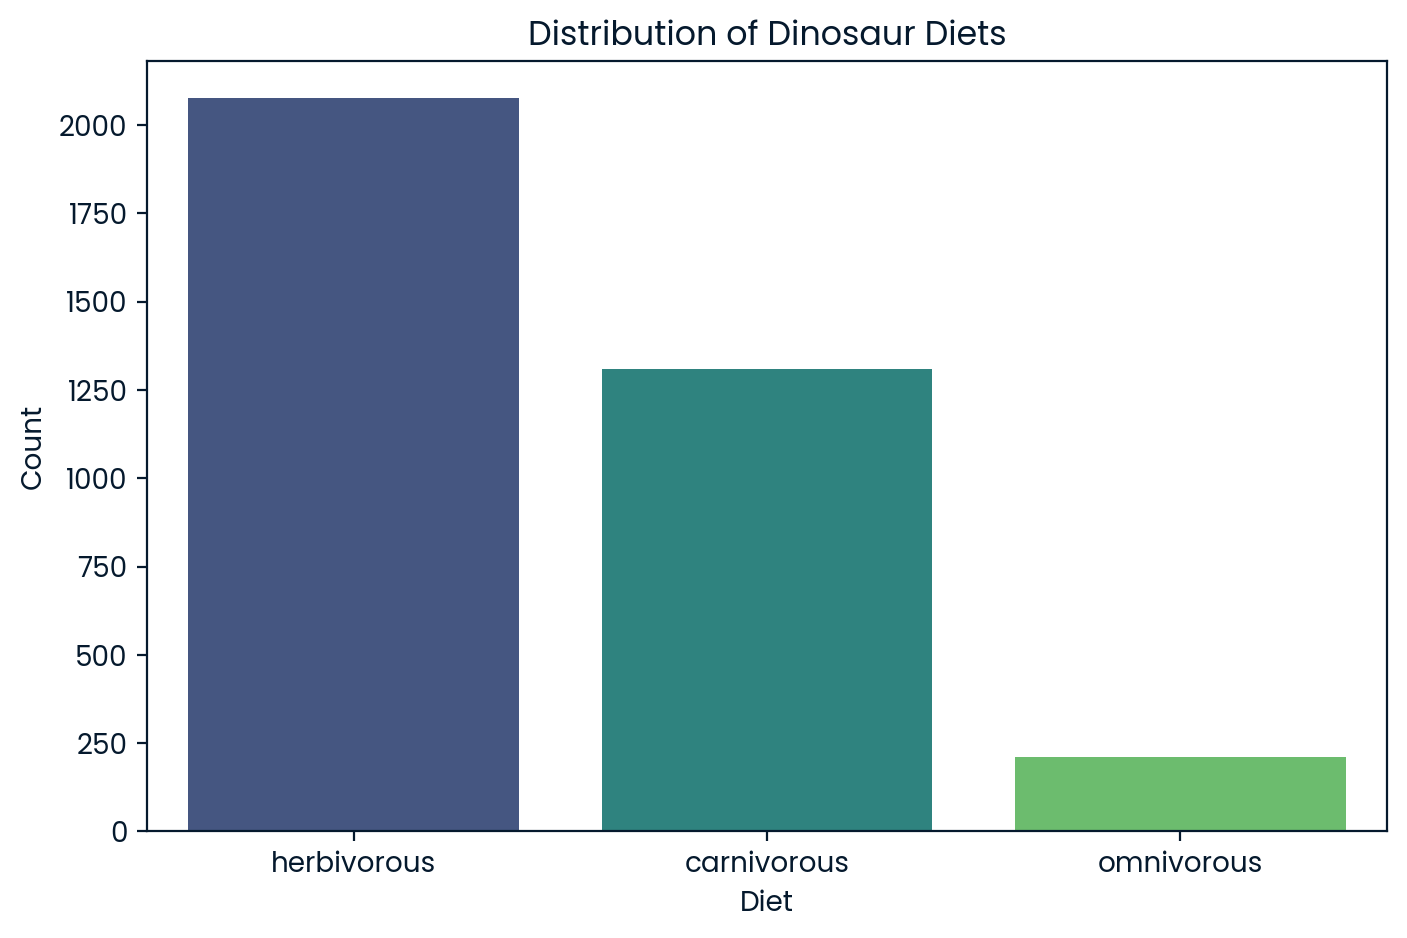

In [4]:
# Create a map centered around the average location
m = folium.Map(location=[dinosaurs['lat'].mean(), dinosaurs['lng'].mean()], zoom_start=2)

for _, row in dinosaurs.iterrows():
    folium.Marker(
        location=[row['lat'], row['lng']],
        popup=f"{row['name']} ({row['type']})",
        icon=folium.Icon(color='green')
    ).add_to(m)

# Save the map as an HTML file (for viewing in a browser)
m.save('dinosaurs_map.html')

m

# Example of another insight: Distribution of dinosaur diets
diet_counts = dinosaurs['diet'].value_counts()

plt.figure(figsize=(8, 5))
sns.barplot(x=diet_counts.index, y=diet_counts.values, palette='viridis')
plt.title('Distribution of Dinosaur Diets')
plt.xlabel('Diet')
plt.ylabel('Count')
plt.show()

The bar chart "Number of Dinosaurs per Type" quantifies the number of dinosaur specimens recorded per type:

- **Ornithopod**: Approximately 800
- **Large theropod**: Approximately 700
- **Small theropod**: Approximately 650
- **Sauropod**: Approximately 600
- **Ceratopsian**: Approximately 400
- **Armored dinosaur**: Approximately 300

Ornithopods are the most numerous, suggesting they were among the most successful and widespread dinosaur types. The diversity in the number of types reflects varied evolutionary adaptations.

## Conclusion
The analysis of the dinosaur datasets provides valuable insights into the paleobiology of dinosaurs, including their dietary habits, physical lengths, and prevalence of different types. Herbivorous dinosaurs dominated in terms of diet, sauropods were among the largest, and ornithopods were the most numerous. This data can help understand the ecological dynamics of the Mesozoic era and the evolutionary success of different dinosaur groups.